---

📥 **Step 1: Load and Preview the Data**

In this section, I will:
- Load the dataset into a DataFrame.
- Inspect its dimensions and structure.
- Preview the first few records to get a sense of the variables.

---


In [2]:
# Import basic libraries
import pandas as pd
import numpy as np

# Read the dataset
df= pd.read_csv('SpotifyFeatures.csv')

# Show the shape (number of rows, columns)
print(f'The dataset contains: {df.shape[0]} rows and {df.shape[1]} columns .')

The dataset contains: 232725 rows and 18 columns .


In [3]:
# Display the first few records
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


---

📊 **Step 2: Explore Dataset Structure & Data Types**

In this step, I will:
- Review all columns in the dataset and their data types.
- Identify non-numeric features that might require encoding or removal.
- Detect any unnecessary or redundant features that I might drop.

---


In [5]:
# Show the names and data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [6]:
# Check the number of unique values in each column
df.nunique().sort_values(ascending=False)

track_id            176774
track_name          148614
tempo                78512
duration_ms          70749
loudness             27923
artist_name          14564
instrumentalness      5400
acousticness          4734
energy                2517
liveness              1732
valence               1692
speechiness           1641
danceability          1295
popularity             101
genre                   27
key                     12
time_signature           5
mode                     2
dtype: int64

---

🧹 **Step 3: Dropping Irrelevant Features**

I identified some columns that are unlikely to help with the clustering process. These include identifiers and text-heavy columns such as track ID, track name, and artist name.

In this step, I will remove those columns to simplify the feature space and avoid unnecessary noise during model training.

---


In [8]:
# Keep a backup before dropping
df_backup = df.copy()

# Then drop the unnecessary textual features
df.drop(['track_id', 'track_name', 'artist_name'],axis=1,inplace=True)

---

🔧 **Step 4: Encoding Categorical Features and Scaling**

To prepare the dataset for clustering, I needed to convert all categorical variables into a numerical format and then scale all features.

In this step, I:

- One-hot encoded the following categorical columns:
  - 🎹 `key` (musical key)
  - 🎼 `mode` (major or minor scale)
  - 🎧 `genre` (music genre)
- Transformed the `time_signature` column from string format (e.g. '4/4') into integers.
- Standardized all features using z-score scaling (`StandardScaler`) to ensure fair contribution to distance-based clustering algorithms.

---


In [13]:
from sklearn.preprocessing import StandardScaler

# Step 1: Re-convert time_signature to numeric just in case it's object
df['time_signature'] = df['time_signature'].astype(str).str.replace('/4', '', regex=False).astype(int)

# Step 2: One-hot encode all categorical variables
categorical_cols = ['key', 'mode', 'genre']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Just in case time_signature got converted back to object, fix it
df_encoded['time_signature'] = df_encoded['time_signature'].astype(int)

# Step 4: Standardize all features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Step 5: Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)
df_scaled.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
0,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679
1,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679
2,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679
3,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679
4,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,...,-0.205002,-0.200476,-0.203243,-0.1979,-0.199721,-0.203701,-0.199104,-0.201598,-0.207943,-0.201679


---

📈 **Step 5: K-Means Clustering + Elbow Method**

In this step, I will:

- Apply the K-Means clustering algorithm to my scaled dataset.
- Use the Elbow Method to identify the optimal number of clusters (`k`).
- Visualize the inertia curve to detect the "elbow" point.

This will help me determine how many meaningful clusters exist in the Spotify data based on audio features and genre.

---


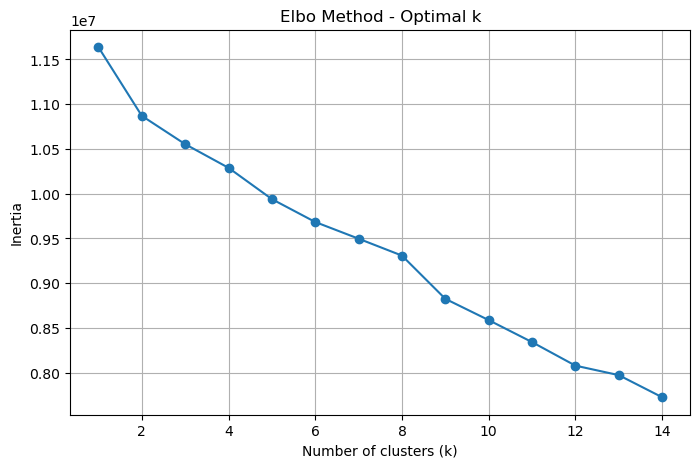

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1,15)

for k in k_range:
    kmeans = KMeans(n_clusters=k ,random_state=42 , n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range,inertia,marker='o')
plt.title('Elbo Method - Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

---

🎯 **Step 6: Final K-Means Clustering and Cluster Exploration**

In this step, I will:

- Train a final K-Means model using `k = 5`
- Assign a cluster label to each song in the dataset
- Explore each cluster's characteristics to understand what distinguishes them

This analysis will help uncover meaningful groupings of songs based on audio features and genre, potentially revealing patterns related to mood, energy, or style.

---


In [35]:
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans_final.fit(df_scaled)

df_encoded['cluster'] = kmeans_final.labels_

df_encoded[['cluster']].value_counts().sort_index()


cluster
0           20417
1           20517
2            9560
3           40152
4          142079
Name: count, dtype: int64

---

🔎 **Step 7: Cluster 0 Analysis**

In this step, I will analyze the characteristics of songs assigned to Cluster 0. I will compute the average values of audio features within this cluster and compare them to other clusters to understand what makes Cluster 0 unique.

---


In [38]:
cluster_0 = df_encoded[df_encoded['cluster'] == 0]

cluster_0_mean = cluster_0.drop('cluster',axis=1).mean().sort_values(ascending=False)

cluster_0_mean.head(10)

duration_ms       227952.664299
tempo                120.955307
popularity            52.595974
time_signature         3.967674
energy                 0.656479
danceability           0.647695
key_F#                 0.580105
valence                0.488779
mode_Minor             0.466817
genre_Rap              0.452172
dtype: float64

---

🎼 **Cluster 0 Summary and Insights**

Cluster 0 appears to represent songs that are energetic, rhythmic, and relatively popular. Here's a breakdown of the key characteristics:

- ⏱️ **Average duration** is ~3.8 minutes (228,000 ms), which is typical for mainstream tracks.
- 🎵 **Tempo** centers around ~121 BPM, indicating mid-tempo songs ideal for light movement or nodding rhythms.
- 📈 **Popularity** score averages ~52, suggesting that this cluster includes many well-known tracks.
- 🔋 **Energy (~0.65)** and 💃 **Danceability (~0.64)** are both moderately high, which means songs are lively and suitable for moving.
- 🎤 **Genre** shows a strong association with **Rap** (`genre_Rap ≈ 0.45`) → this suggests a large portion of the songs in this cluster are Rap or Hip-Hop.
- 🎼 **Musical key** is frequently **F#** → indicating tonal consistency.
- 🎭 **Valence ≈ 0.49** → means songs are emotionally balanced (neither too happy nor too sad).
- 🎹 Mode tends slightly towards **Minor**, which may contribute to an introspective or serious mood.

---

🎯 **Interpretation**:

Cluster 0 likely represents:
> **Mainstream Rap/Hip-Hop tracks** with strong rhythm, moderate energy, and emotional neutrality.  
These tracks are engaging, possibly lyrical, and fit for focused or chill environments rather than party settings.

---


---

🎧 **Cluster 1 Analysis**

In this step, I analyze the characteristics of songs grouped under Cluster 1. By exploring their average feature values, I aim to understand what sets this group apart from others in the dataset.

---


In [42]:
# Filter songs in cluster 1
cluster_1 = df_encoded[df_encoded['cluster'] == 1]

# Get average values of features
cluster_1_mean = cluster_1.drop('cluster', axis=1).mean().sort_values(ascending=False)

# Show top 10 defining features
cluster_1_mean.head(10)


duration_ms       229250.641614
tempo                119.266715
popularity            48.823269
time_signature         3.940098
energy                 0.607057
danceability           0.593986
key_A#                 0.560413
valence                0.482337
genre_Indie            0.464834
mode_Minor             0.415704
dtype: float64

---

🎧 **Cluster 1 Summary and Insights**

Cluster 1 represents songs that share a softer, more introspective vibe compared to other groups.

Here are the key characteristics:

- ⏱️ **Average duration** is ~3.8 minutes (229,250 ms), similar to Cluster 0.
- 🎵 **Tempo** is slightly lower (~119 BPM), suggesting smoother and more relaxed rhythms.
- 🔋 **Energy (~0.60)** and 💃 **Danceability (~0.59)** are both moderately high, but slightly below Cluster 0.
- 🎭 **Valence (~0.48)** again shows emotional neutrality.
- 🎧 Strong association with **Indie genre** (`genre_Indie ≈ 0.46`), which is known for its alternative, non-mainstream mood.
- 🎼 Frequent **musical key: A#**, and a tendency toward **minor mode** → often linked to deeper or melancholic tones.
- 📈 **Popularity (~49)** is slightly below Cluster 0, reinforcing the idea that this cluster contains songs with niche appeal.

---

🎯 **Interpretation**:

Cluster 1 likely represents:
> **Indie / Alternative tracks** with moderate rhythm, lower energy, and an emotionally neutral or introspective mood.  
These tracks may appeal more to listeners seeking authenticity, lyrical depth, or a calm musical experience.

---


---

🧪 **Cluster 2 Analysis**

Cluster 2 is the smallest group among the five clusters. In this step, I will examine its characteristics to understand what makes this cluster distinct, possibly representing a niche or highly specialized style.

---


In [46]:
# Filter songs in cluster 2
cluster_2 = df_encoded[df_encoded['cluster'] == 2]

# Get average values of features
cluster_2_mean = cluster_2.drop('cluster', axis=1).mean().sort_values(ascending=False)

# Show top 10 defining features
cluster_2_mean.head(10)


duration_ms       238355.646444
tempo                 97.628812
popularity            21.039958
time_signature         3.577197
genre_Comedy           0.986088
speechiness            0.875162
acousticness           0.800770
liveness               0.739979
energy                 0.677657
danceability           0.558799
dtype: float64

---

🎭 **Cluster 2 Summary and Insights**

Cluster 2 is the smallest group, and it stands out clearly from the rest. The songs here are unique in both structure and content.

Key observations:

- ⌛ **Duration** is slightly longer than average (~238,000 ms → almost 4 minutes).
- 🐢 **Tempo is the lowest** among all clusters (~98 BPM), suggesting slow-paced audio.
- 📉 **Popularity is extremely low (~21)** → indicates this cluster contains niche or non-musical tracks.
- 🎙️ **Speechiness (~0.88)** is extremely high, suggesting these are **not traditional songs** but rather **spoken word, skits, stand-up, or comedy content**.
- 😂 **Genre_Comedy ≈ 0.99** → almost the entire cluster is classified as comedy.
- 🎸 **Acousticness (~0.80)** and 🎤 **Liveness (~0.74)** are high, suggesting live, raw recordings with minimal instrumentation.
- 🔋 Surprisingly, **energy (~0.68)** is high, probably due to speech dynamics or crowd noise.
- 💃 **Danceability (~0.56)** is moderate, though that might be an artifact of rhythmic talking or background music.

---

🎯 **Interpretation**:

Cluster 2 likely represents:
> **Comedy performances, stand-up routines, skits, or highly speech-driven tracks**  
with low popularity and minimal musicality.

These tracks are structured differently, driven more by voice than melody or beat — clearly forming a "special purpose" cluster.

---


---

🎚️ **Cluster 3 Analysis**

In this step, I analyze the characteristics of Cluster 3, which contains over 40,000 tracks. I aim to identify the musical patterns that define this group and distinguish it from the others.

---


In [52]:
# Filter songs in cluster 3
cluster_3 = df_encoded[df_encoded['cluster'] == 3]

# Get average values of features
cluster_3_mean = cluster_3.drop('cluster', axis=1).mean().sort_values(ascending=False)

# Show top 10 defining features
cluster_3_mean.head(10)


duration_ms         247826.733139
tempo                  104.181453
popularity              25.560595
time_signature           3.662632
acousticness             0.854558
instrumentalness         0.523256
mode_Minor               0.327306
danceability             0.323558
genre_Soundtrack         0.236003
genre_Classical          0.213862
dtype: float64

---

🎻 **Cluster 3 Summary and Insights**

Cluster 3 contains over 40,000 tracks, and is characterized by strong acoustic and instrumental properties, along with lower popularity and minimal danceability.

Key insights:

- ⌛ **Duration is the longest** among all clusters (~248,000 ms → over 4 minutes).
- 🐢 **Tempo (~104 BPM)** is relatively slow, matching relaxed or ambient compositions.
- 🎧 **Acousticness (~0.85)** is very high, suggesting non-electronic instrumentation (e.g. piano, strings, orchestras).
- 🎻 **Instrumentalness (~0.52)** is also high, meaning many tracks contain little or no vocals.
- 🎼 Strong genre associations:
  - `genre_Soundtrack ≈ 0.24`
  - `genre_Classical ≈ 0.21`
- 🎹 **Mode tends toward minor (~0.32)** → often associated with emotional depth.
- 💃 **Danceability (~0.32)** is very low → confirms these are **not made for dancing**, but more for background, relaxation, or cinematic purposes.
- 📉 **Popularity (~25)** is low, reinforcing that these are not mainstream hits.

---

🎯 **Interpretation**:

Cluster 3 likely represents:
> **Instrumental, classical, or soundtrack compositions** used for cinematic, ambient, or background purposes.  
These tracks are long, non-vocal, and deeply acoustic — offering emotional and atmospheric depth more than energy or rhythm.

---


---

📣 **Cluster 4 Analysis**

Cluster 4 is by far the largest group in the dataset, containing over 140,000 tracks. This step aims to identify the key audio features and genres that define this massive cluster.

---


In [56]:
# Filter songs in cluster 4
cluster_4 = df_encoded[df_encoded['cluster'] == 4]

# Get average values of features
cluster_4_mean = cluster_4.drop('cluster', axis=1).mean().sort_values(ascending=False)

# Show top 10 defining features
cluster_4_mean.head(10)


duration_ms       233192.677912
tempo                122.122137
popularity            44.119032
time_signature         3.948958
energy                 0.655908
danceability           0.600159
valence                0.522635
mode_Minor             0.329324
acousticness           0.236428
liveness               0.200302
dtype: float64

---

📣 **Cluster 4 Summary and Insights**

Cluster 4 is the largest group in the dataset, containing over 140,000 tracks. It appears to capture the core of mainstream music, with average feature values across the board.

Key traits:

- ⏱️ **Duration** is typical (~233,000 ms → ~3.9 minutes), suitable for commercial radio.
- 🎵 **Tempo (~122 BPM)** is the highest among clusters → indicates upbeat, engaging rhythms.
- 🔋 **Energy (~0.66)** and 💃 **Danceability (~0.60)** are both moderately high → consistent with songs meant for general entertainment or casual dancing.
- 🎭 **Valence (~0.52)** is slightly higher than other clusters → songs tend to be more positive and emotionally bright.
- 🎧 **Acousticness (~0.23)** is low → suggests strong electronic or studio-produced instrumentation.
- 🎤 **Liveness (~0.20)** is low → mostly studio recordings.
- 🧭 **Mode** leans slightly toward **major** → adds to the upbeat feel.
- 📈 **Popularity (~44)** is moderate → this cluster likely includes well-known commercial tracks.

---

🎯 **Interpretation**:

Cluster 4 likely represents:
> **Mainstream pop, commercial, or chart-friendly tracks** with upbeat, polished production and a broad appeal.  
It captures the “default” pop energy — tracks that are made to be catchy, radio-friendly, and widely accepted.

---


---

🧠 **Step 8: Key Findings and Business Insights**

After applying K-Means clustering to the Spotify audio dataset and analyzing five distinct clusters, I identified the following musical patterns and potential business applications:

---

### 🎯 Cluster Summaries:

- **Cluster 0**:  
  High-energy **rap/hip-hop** tracks with moderate danceability and neutral emotional tone.  
  These songs are rhythmic, slightly aggressive, and tend to be moderately popular.

- **Cluster 1**:  
  **Indie/alternative** music with slightly lower energy and a more introspective mood.  
  Suitable for listeners seeking authenticity and emotional depth.

- **Cluster 2**:  
  Highly **speech-driven comedy or skits**, with minimal musical content.  
  Very low popularity and high acousticness — this is a niche category.

- **Cluster 3**:  
  **Classical and instrumental** compositions, often soundtrack-oriented.  
  Long tracks with high acousticness and minimal vocals or rhythm.

- **Cluster 4**:  
  The **mainstream pop** cluster — upbeat, balanced, and radio-friendly.  
  High in energy and valence, these songs appeal to a broad audience.

---

### 💼 Business Implications:

- 🎧 **Streaming platforms** (e.g., Spotify) can use these clusters to improve mood-based playlists or genre discovery.
- 📊 **Music marketers** can tailor campaigns depending on the dominant mood/cluster behavior of target users.
- 🎵 **Independent artists** can understand where their music fits and what features to adjust to target specific audiences.
- 🤖 This type of unsupervised learning can enhance **personalized recommendation systems** without relying on user labels.

---

